## CHAPTER07 인공 신경망 기초 - 문제와 돌파구 (p.271)

### 7.1 XOR 연산은 다음과 같이 논리합과 논리곱, 그리고 부정으로 표현할 수 있다.

$ x \oplus y = (x \lor y) \land \neg(x \land y) $

이러한 동작을 수행하는 신경망은 OR, AND, NAND를 수행하는 퍼셉트론을 조합하여 구현할 수 있을 것이다. 이를 설계해 보라.

### 7.2 시그모이드 함수는 다음과 같이 표현된다. 이 함수의 미분함수를 구하려고 한다.

$ \phi(x) = {1 \over 1+e^{-x}} $

이 함수의 미분을 $ {\phi}'(x) $라고 하면, 다음과 같은 성질을 갖는데, 이를 유도해 보라.

$ \phi'(x) = \phi(x)(1 - \phi(x)) $


<small>(1+e<sup>-x</sup>을 f(x)라고 하면, ϕ(x) = f(x)<sup>-1</sup>이고, 미분은 -f(x)<sup>-2</sup>•f'(x)가 된다.)</small>

### 7.3 케라스 모델을 이용하면 신경망의 계층을 유연하게 변경할 수 있다. 앞에서 실습한 내용을 변경하여 아래처럼 층을 하나 늘려 예측 능력이 어떻게 변화하는지 확인해 보라.

```
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(1, activation='sigmoid'),
])
```

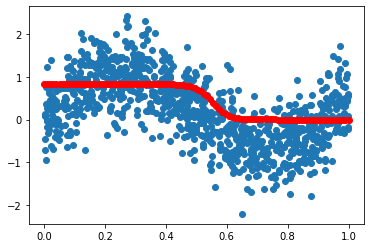

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 텐서플로우와 케라스를 사용할 수 있도록 준비
import tensorflow as tf         # 텐서플로우는 주로 tf라는 별명을 사용한다
from tensorflow import keras

# 모델 생성
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(1, activation='sigmoid'),
])

# 모델 컴파일
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

# 데이터
data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'nonlinear.csv')
X       = df['x'].to_numpy()
y_label = df['y'].to_numpy()

# 훈련
model.fit(X, y_label, epochs=100, verbose=0)

# 결과 확인
domain = np.linspace(0, 1, 100).reshape(-1,1) # 입력은 2차원 벡터로 변형

y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

### 7.4 단층 퍼셉트론에 여러 계층을 추가함으로써 선형 분리만 가능하던 퍼셉트론이 비선형 분리를 할 수 있게 되었다. 그러면 층을 매우 많이 쌓으면 더 복잡한 곡선을 만들어내지 않을까? 층을 10개 이상 쌓아서 회귀 문제를 더 잘 푸는지 확인해 보자.

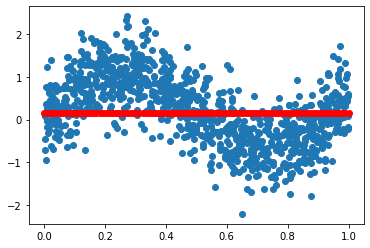

In [2]:
# 모델 생성
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(4, activation='sigmoid'),
  keras.layers.Dense(1, activation='sigmoid'),
])

# 모델 컴파일
optimizer = keras.optimizers.SGD(learning_rate=5.0)
model.compile(optimizer=optimizer, loss='mse')

# 훈련
model.fit(X, y_label, epochs=100, verbose=0)

# 결과 확인
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

#### (1) 문제를 더 잘 풀었는가?

In [3]:
print("문제를 더욱 못풀었다.")

문제를 더욱 못풀었다.


#### (2) 문제를 더 잘 풀거나 못 푼 이유가 무엇인지 생각해 보라.

In [4]:
print("""시그모이드 함수가 반복해서 연산되므로 Gradient소실이 발생되어
 출력계층에 와서는 입력데이터의 의미가 사라졌다.""")

시그모이드 함수가 반복해서 연산되므로 Gradient소실이 발생되어
 출력계층에 와서는 입력데이터의 의미가 사라졌다.


### 7.5 활성화 함수는 시그모이드 뿐만 아니라 여러 종류의 함수를 사용할 수 있다. 아래와 같이 각 계층의 활성화 함수를 tanh를 쓰면 어떻게 될지 살펴 보자. 이때 학습률을 0.1로 바꾸어 보았다.
```
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(1, activation='tanh'),
])

# 모델 컴파일
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse')
```

이 학습의 결과는 다음과 같다. 이러한 결과를 얻을 수 있었던 이유에 대해 서술해 보라.

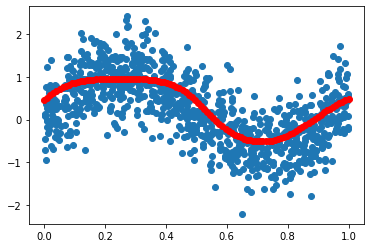

In [5]:
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(1, activation='tanh'),
])

# 모델 컴파일
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse')

# 훈련
model.fit(X, y_label, epochs=100, verbose=0)

# 결과 확인
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

In [6]:
print("""더욱 문제를 잘 푸는 결과를 얻었다.
tanh함수를 사용하면 미분시의 최대값이 1로 sigmoid의 것보다 눈에 띄게 높아 
Gradient소실 문제를 완하시킬 수 있고, 학습률도 0.1로 대폭 낮추어 더욱 정밀하게 
훈련을 시켰기 때문이다.""")

더욱 문제를 잘 푸는 결과를 얻었다.
tanh함수를 사용하면 미분시의 최대값이 1로 sigmoid의 것보다 눈에 띄게 높아 
Gradient소실 문제를 완하시킬 수 있고, 학습률도 0.1로 대폭 낮추어 더욱 정밀하게 
훈련을 시켰기 때문이다.


### 7.6 앞의 문제를 풀면서 사용한 학습률을 0.1, 1.0, 2.0, 5.0으로 변경하여 학습을 수행한 결과를 비교해보고, 적절한 하이퍼파라미터의 중요성에 대해 서술해 보라.

학습률이 너무 높으면 오히려 나쁜 결과를 얻을 수가 있다.


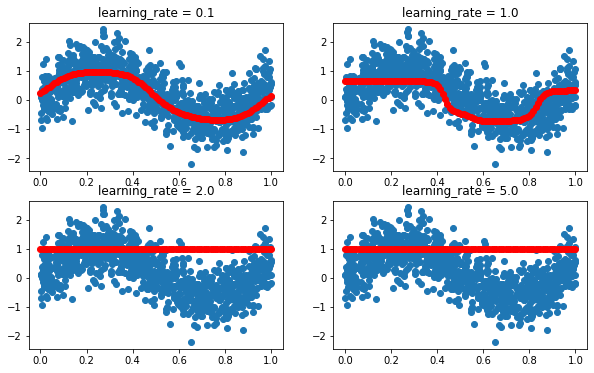

In [11]:
plt.figure(figsize=(10, 6))

for i, learning_rate in enumerate([0.1, 1.0, 2.0, 5.0]):
  model = keras.models.Sequential( [
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(4, activation='tanh'),
    keras.layers.Dense(1, activation='tanh'),
  ])

  # 모델 컴파일
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
  model.compile(optimizer=optimizer, loss='mse')

  # 훈련
  model.fit(X, y_label, epochs=100, verbose=0)

  # 결과 확인
  y_hat = model.predict(domain)
  
  plt.subplot(221+i)
  plt.title('learning_rate = {}'.format(learning_rate))
  plt.scatter(df['x'], df['y'])
  plt.scatter(domain, y_hat, color='r')

print("""학습률이 너무 높으면 오히려 나쁜 결과를 얻을 수가 있다.""")

### 7.7 활성화 함수를 tanh로 하여 10개의 층을 쌓고, 학습률을 0.1로 학습을 100 에폭<sup>epoch</sup>실시해 보라. 아래와 같은 결과를 얻을 수 있다. 이 결과와 문제 7.4의 결과를 비교해 보고 차이가 발생한 이유에 대해 서술해 보라.

tanh함수를 사용하여 Gradient소실 문제를 완하하였기 때문에
10층의 깊은 신경망에서도 좋은 결과를 얻었다.


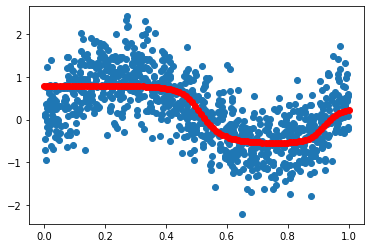

In [12]:
model = keras.models.Sequential( [
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(4, activation='tanh'),
  keras.layers.Dense(1, activation='tanh'),
])

# 모델 컴파일
optimizer = keras.optimizers.SGD(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='mse')

# 훈련
model.fit(X, y_label, epochs=100, verbose=0)

# 결과 확인
y_hat = model.predict(domain)
plt.scatter(df['x'], df['y'])
plt.scatter(domain, y_hat, color='r')

print("""tanh함수를 사용하여 Gradient소실 문제를 완하하였기 때문에
10층의 깊은 신경망에서도 좋은 결과를 얻었다.""")

tanh함수를 사용하여 Gradient소실 문제를 완하하였기 때문에
10층의 깊은 신경망에서도 좋은 결과를 얻었다.
